In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("concrete.csv")
df=pd.DataFrame(data=data)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

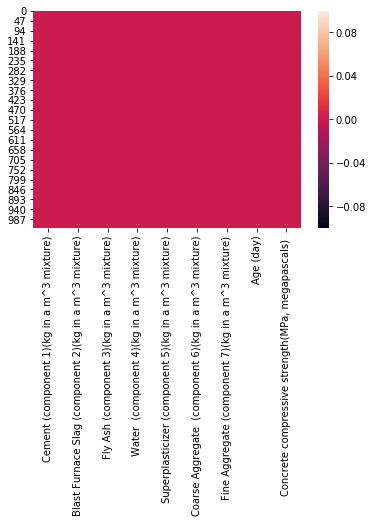

In [6]:
sns.heatmap(df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x197746d9278>,
 'caps': [<matplotlib.lines.Line2D at 0x19774a104e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19774a049e8>],
 'medians': [<matplotlib.lines.Line2D at 0x19774a10b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x19774a10eb8>],
 'means': []}

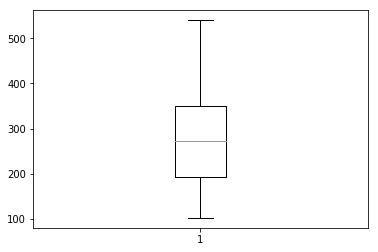

In [7]:
plt.boxplot(df['Cement (component 1)(kg in a m^3 mixture)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19774a1c438>,
 'caps': [<matplotlib.lines.Line2D at 0x1977426e470>,
 'boxes': [<matplotlib.lines.Line2D at 0x197744009b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1977426eb00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1977426ee48>],
 'means': []}

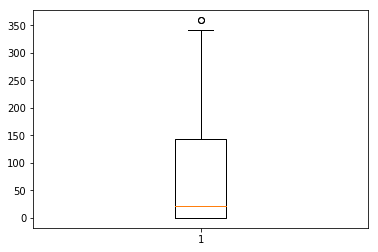

In [8]:
plt.boxplot(df["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x197746d9fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x19774aa9400>,
 'boxes': [<matplotlib.lines.Line2D at 0x19774a9f940>],
 'medians': [<matplotlib.lines.Line2D at 0x19774aa9a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x19774aa9dd8>],
 'means': []}

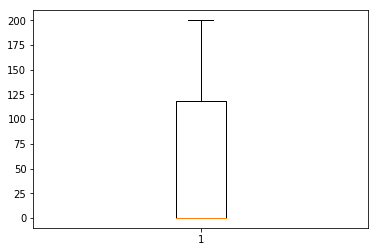

In [9]:
plt.boxplot(df["Fly Ash (component 3)(kg in a m^3 mixture)"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19774d37748>,
 'caps': [<matplotlib.lines.Line2D at 0x19774e23ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19774e23470>],
 'medians': [<matplotlib.lines.Line2D at 0x19774e2e5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19774e2e908>],
 'means': []}

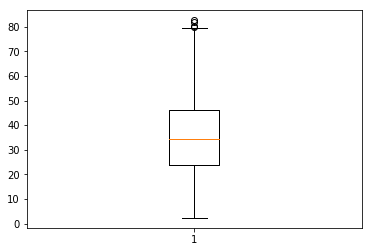

In [15]:
plt.boxplot(df['Concrete compressive strength(MPa, megapascals) '])

In [17]:
dfcorr=df.corr()
dfcorr

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
"Concrete compressive strength(MPa, megapascals)",0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


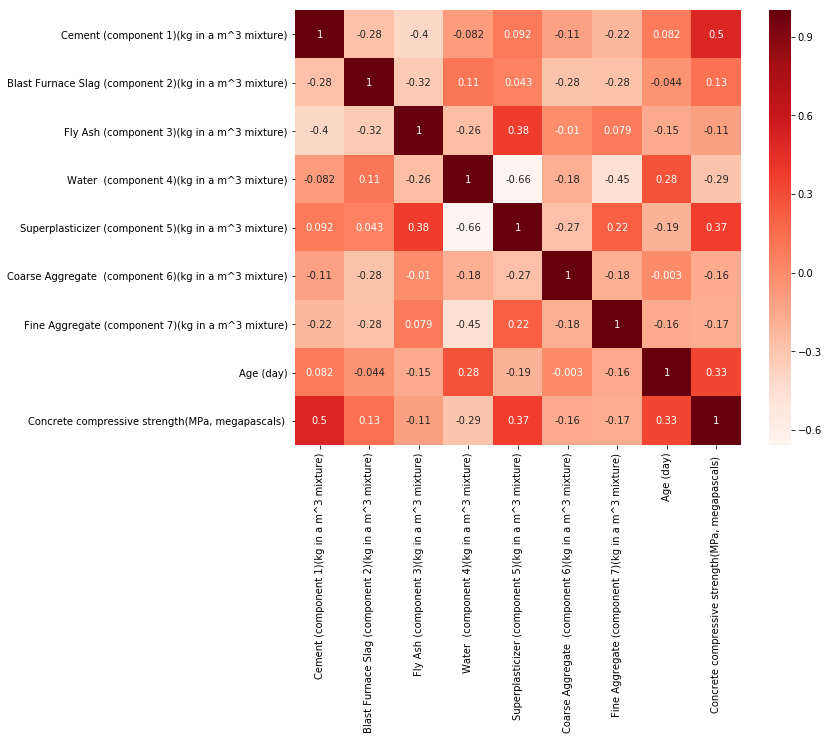

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr,cmap="Reds",annot=True)

In [19]:
df.shape

(1030, 9)

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [25]:
x=df_new.iloc[:,:-1]
#x.head()
y=df_new.iloc[:,-1]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.7069856673241293

In [52]:
lr.score(x_train,y_train)

0.6901588190526005

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print("r2 score is", r2_score(y_test,pred),"when random state is 47")

r2 score is 0.7322368807815405 when random state is 47


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=46)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print("r2 score is", r2_score(y_test,pred),"when random state is 46")

r2 score is 0.6950903763192124 when random state is 46


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=45)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print("r2 score is", r2_score(y_test,pred),"when random state is 45")

r2 score is 0.6976897275364815 when random state is 45
